<a href="https://colab.research.google.com/github/rob195286/IA/blob/main/labo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

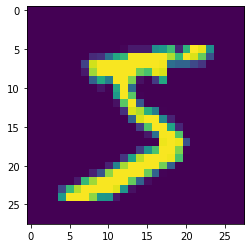

In [19]:
#1-2
import gzip
import matplotlib.pyplot as plt
import numpy as np

f = gzip.open('train-images-idx3-ubyte.gz','r')

images_size = 28
images_number = 60000
# retire les 16 premier octets du buffer car on veut juste les images.
f.read(16)
buf = f.read()
# frombuffer -> prend un buffer le transforme en array 1D et indique le type de données. || astype -> copie un array et le cast dans le type voulu. 
array = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# transforme l'array 1D en un array ayant comme nouvelle dimensions celle sindiqué (arg 1 -> nbr ligne, arg n -> nbr colonne).
images_array = array.reshape(images_number, images_size, images_size)
# asarray -> convertis l'entré en array. || squeeze -> enlève les parenthèses inutile en ramenant un array de n-D avec une valeur encapsulé plusieurs en 1-D.
image1 = images_array[0]
plt.imshow(image1)
plt.show()

In [20]:
#3
import pandas as pd

f = gzip.open('train-labels-idx1-ubyte.gz','r')

f.read(8)
buf = f.read(images_number)
target_array = np.frombuffer(buf, dtype=np.uint8).astype(np.int8)
serie_number = pd.DataFrame({'classes':target_array})
classes_list = [len(serie_number.loc[lambda x: x['classes'] == classes, :]) for classes in range(10)]

for index, element in enumerate(classes_list, 0):
  print('classe {} : {}'.format(index, element))
print('sum : ', sum(classes_list))

classe 0 : 5923
classe 1 : 6742
classe 2 : 5958
classe 3 : 6131
classe 4 : 5842
classe 5 : 5421
classe 6 : 5918
classe 7 : 6265
classe 8 : 5851
classe 9 : 5949
sum :  60000


In [21]:
#4
from sklearn import model_selection, svm

train_data, test_data = model_selection.train_test_split(images_array, test_size = 0.1, train_size = 0.9, shuffle=False)

In [22]:
#5
# choix de classification supervisé. supervisé -> car l'apprentissage se fait avec les résultats || classification -> car on a des résultat discret.

classifier = svm.SVC()
#classifier.fit(train_data, train_data)
#classifier.predict(X)

In [89]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(24, 26, 24), max_iter=100, random_state=1)
#clf.fit(train_data, target_array[:int(60000*0.9)])    

train_data = train_data.reshape(len(train_data), images_size**2)
clf.fit(train_data, target_array[:int(60000*0.9)]) 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(24, 26, 24), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

[4]


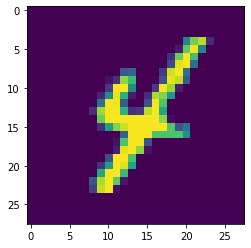

In [100]:
test=7
test_data = test_data.reshape(len(test_data), images_size**2)
#clf.predict_proba(np.asarray([test_data[3]]))
print(clf.predict(np.asarray([test_data[test]])))
plt.imshow(test_data[test].reshape(images_size, images_size))
plt.show()